In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
rawRDD = sc.textFile('/home/dirk/code/research/names/tweets.txt').cache()

In [10]:
dictRDD = rawRDD.map(eval)

In [14]:
type(dictRDD)

pyspark.rdd.PipelinedRDD

In [15]:
type(dictRDD.take(2))

list

In [16]:
type(dictRDD.take(2)[0])

dict

In [4]:
sc.parallelize('abcaba').countByValue()

NameError: name 'sc' is not defined

In [20]:
tweetCountByUser = dictRDD\
  .map(lambda x: x['user']['screen_name'])\
  .countByValue()

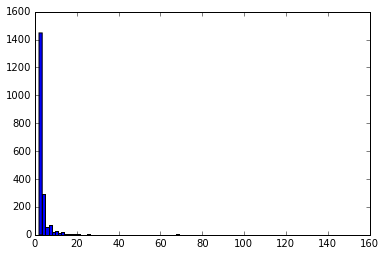

In [27]:
hist([n for n in tweetCountByUser.values() if n != 1], bins=100)
None

In [37]:
sc.parallelize(range(100)).reduce(lambda x, y: x + y)

4950

In [50]:
mostFollowedTen = dictRDD\
    .map(lambda x: (x['user']['screen_name'],
                    x['user']['followers_count']))\
    .reduceByKey(max)\
    .sortBy(lambda x: -x[1])\
    .take(10)

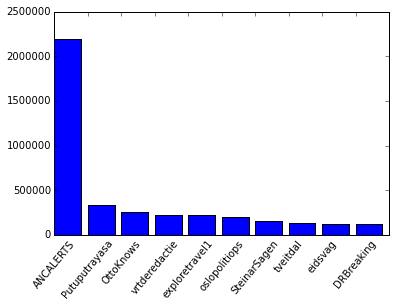

In [54]:
xvals = range(len(mostFollowedTen))
bar(xvals, [i[1] for i in mostFollowedTen])
xticks(xvals, [i[0] for i in mostFollowedTen], rotation=50)
None

In [64]:
numberOfHashtags = dictRDD\
    .map(lambda x: len(x['entities']['hashtags']))\
    .collect()

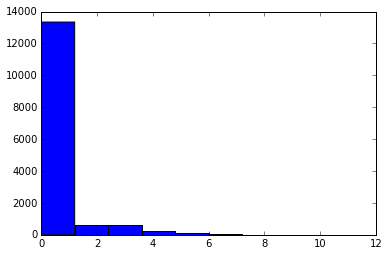

In [68]:
hist(numberOfHashtags)
None